## Анализ бизнес-показателей
*(убрал подробности в целях соблюдения авторских прав)*

Для анализа представлена информация:
- `visits` - лог сервера с информацией о посещениях сайта.  
- `orders` - информация о заказах.  
- `costs` - информация о затратах на маркетинг.  

Требуется произвести анализ продаж, продукта и маркетинговой составляющей, найти узкие места и недоработки.

## Шаг 1. Загружу данные и подготовлю их к анализу

Загружу данные о визитах, заказах и расходах в переменные. Оптимизирую данные для анализа. Убежусь, что тип данных в каждой колонке — правильный.

In [1]:
# импорт нужных библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.2f}'.format

In [2]:
visits = pd.read_csv('datasets/visits_log.csv')
orders = pd.read_csv('datasets/orders_log.csv')
costs = pd.read_csv('datasets/costs.csv')

In [3]:
def print_info(df, name=''):
    print('Информация по таблице', name)
    print()
    display(df.sample(5))
    print()
    display(df.info())
    print()
    display(df.describe())
    print()

In [4]:
print_info(visits, 'visits')
print_info(orders, 'orders')
print_info(costs, 'costs')

Информация по таблице visits



,Device,End Ts,Source Id,Start Ts,Uid
302689,touch,2018-04-29 17:29:00,5,2018-04-29 17:27:00,15720909672748479655
174585,desktop,2018-01-07 02:10:00,4,2018-01-07 02:09:00,9919469096407658413
11105,touch,2018-01-29 23:07:00,2,2018-01-29 23:00:00,11492209948415078390
8354,touch,2018-04-25 23:13:00,5,2018-04-25 23:13:00,3785615340505297445
260030,desktop,2018-05-14 08:30:00,5,2018-05-14 08:20:00,14496803846813264572



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


None

,Source Id,Uid
count,359400.00,359400.00
mean,3.75,9202556994354921472.00
std,1.92,5298432824659611648.00
min,1.00,11863502262781.00
25%,3.00,4613406732167550976.00
50%,4.00,9227412908740601856.00
75%,5.00,13728237011236171776.00
max,10.00,18446676030785673216.00



Информация по таблице orders



,Buy Ts,Revenue,Uid
18749,2017-11-21 20:40:00,12.10,3304972421164383631
20362,2017-11-26 23:18:00,0.37,16838664240202607775
7214,2017-09-08 13:47:00,3.36,3634352398208940099
16708,2017-11-08 21:10:00,2.20,13283968101417583179
15982,2017-11-03 16:39:00,2.69,14630951642621965577



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


None

,Revenue,Uid
count,50415.00,50415.00
mean,5.00,9098160634289729536.00
std,21.82,5285741550834715648.00
min,0.00,313578113262317.00
25%,1.22,4533566627250599936.00
50%,2.50,9102273602618561536.00
75%,4.89,13682901980465401856.00
max,2633.28,18446167067214817280.00



Информация по таблице costs



,source_id,dt,costs
1154,4,2017-08-05,73.41
1034,3,2018-04-07,295.39
1588,5,2017-10-15,158.86
1617,5,2017-11-13,249.78
831,3,2017-09-14,454.22



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


None

,source_id,costs
count,2542.00,2542.00
mean,4.86,129.48
std,3.18,156.30
min,1.00,0.54
25%,2.00,21.95
50%,4.00,77.30
75%,9.00,170.06
max,10.00,1788.28


In [5]:
# переименую колонки в соответствии с питоновским стилем именования переменных:
visits_col_dict = {
    'Device': 'device_type'
    , 'End Ts': 'ts_end'
    , 'Source Id': 'id_source'
    , 'Start Ts': 'ts_start'
    , 'Uid': 'uid'
}
orders_col_dict = {
    'Buy Ts': 'purchase_time'
    , 'Revenue': 'revenue_per_order'
    , 'Uid': 'uid'
}

costs_col_dict = {
    'source_id': 'id_source'
    , 'dt': 'date'
    , 'costs': 'cost_per_day'
}

def rename_df(df, col_dict):
    df = df.rename(columns=col_dict)
    display(df.head())
    print()
    return df

In [6]:
visits = rename_df(visits, visits_col_dict)
orders = rename_df(orders, orders_col_dict)
costs = rename_df(costs, costs_col_dict)

,device_type,ts_end,id_source,ts_start,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


,purchase_time,revenue_per_order,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


,id_source,date,cost_per_day
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


##### Теперь столбцы таблицы приняли единообразный вид:

Таблица visits (лог сервера с информацией о посещениях сайта):
- `uid` — уникальный идентификатор пользователя
- `device_name` — категория устройства пользователя
- `ts_start` — дата и время начала сессии
- `ts_end` — дата и время окончания сессии
- `id_source` — идентификатор рекламного источника, из которого пришел пользователь

Таблица orders (информация о заказах):
- `uid` — уникальный id пользователя, который сделал заказ
- `purchase_time` — дата и время заказа
- `revenue_per_order` — выручка Яндекс.Афиши с этого заказа

Таблица costs (информация о затратах на маркетинг):
- `id_source` — идентификатор рекламного источника
- `date` — дата
- `costs_per_day` — затраты на этот рекламный источник в этот день

##### Исправлю неверные типы: в датах

In [7]:
visits.ts_start = pd.to_datetime(visits.ts_start)
visits.ts_end = pd.to_datetime(visits.ts_end)
orders.purchase_time = pd.to_datetime(orders.purchase_time)
costs.date = pd.to_datetime(costs.date)

### Добавление вспомогательных столбцов и статистик

#### Таблица visits
Дополнительные колонки по сессиям

In [8]:
visits['session_date'] = visits.ts_start.astype('datetime64[D]')

Добавлю столбец даты первой сессии по пользователям:

In [9]:
users_first_session_dates = visits.groupby('uid')['session_date'].min().reset_index()
users_first_session_dates = users_first_session_dates.rename(columns={'session_date': 'first_session_date'})
users_first_session_dates['first_session_month'] = users_first_session_dates.\
first_session_date.dt.strftime('%Y-%m')

In [10]:
# объединю таблицы
visits = visits.merge(users_first_session_dates, how='left', on='uid')

In [11]:
# преобразование в строку для удобства графического вывода
visits['first_session_month'] = visits.first_session_date.dt.strftime('%Y-%m')

Lifetime когорты (месяцев с момента регистрации):

In [12]:
# номер месяца отсчитывается от даты регистрации по конкретному пользователю
visits['months_from_reg'] = np.floor(((visits.session_date - visits.first_session_date) /\
                             np.timedelta64(1, 'M'))).astype('int')

Таблица после добавления нужных столбцов:

In [13]:
visits.head()

,device_type,ts_end,id_source,ts_start,uid,session_date,first_session_date,first_session_month,months_from_reg
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-20,2017-12,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-19,2018-02,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-07-01,2017-07,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-03-09,2018-03,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-27,2017-12,0


#### Таблица заказов

Дополнительные столбцы для дня, недели и месяца заказа.

In [14]:
orders['purchase_day'] = orders.purchase_time.astype('datetime64[D]')
orders['purchase_week'] = orders.purchase_time.astype('datetime64[W]')
orders['purchase_month'] = orders.purchase_time.astype('datetime64[M]')

In [15]:
print('Дата первого заказа:', orders.purchase_time.min())
print('Дата последнего заказа:', orders.purchase_time.max())

Дата первого заказа: 2017-06-01 00:10:00
Дата последнего заказа: 2018-06-01 00:02:00


In [16]:
orders[['purchase_day', 'purchase_week', 'purchase_month']].nunique()

purchase_day      364
purchase_week      53
purchase_month     13
dtype: int64

Данные согласуются с датами первого и последнего заказов, следовательно, новые вспомогательные колонки заполнены верно.

In [17]:
orders = orders.merge(users_first_session_dates, on='uid', how='left')
# проверка
display(orders.head())
orders.isnull().sum()

,purchase_time,revenue_per_order,uid,purchase_day,purchase_week,purchase_month,first_session_date,first_session_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06


purchase_time          0
revenue_per_order      0
uid                    0
purchase_day           0
purchase_week          0
purchase_month         0
first_session_date     0
first_session_month    0
dtype: int64

In [18]:
# данные по всем пользователям присоединены

# доп. проверка
display(orders.sample(5))

,purchase_time,revenue_per_order,uid,purchase_day,purchase_week,purchase_month,first_session_date,first_session_month
41136,2018-03-22 13:16:00,2.50,12558214849472071039,2018-03-22,2018-03-22,2018-03-01,2017-09-01,2017-09
1377,2017-06-14 10:42:00,5.50,1210481103526146221,2017-06-14,2017-06-08,2017-06-01,2017-06-01,2017-06
33919,2018-02-10 12:39:00,2.93,18335218882047868084,2018-02-10,2018-02-08,2018-02-01,2018-02-10,2018-02
13654,2017-10-19 23:14:00,0.92,4964580620282996681,2017-10-19,2017-10-19,2017-10-01,2017-09-26,2017-09
46935,2018-05-11 09:52:00,3.30,1488474230954948564,2018-05-11,2018-05-10,2018-05-01,2018-05-11,2018-05


Проверка, что дата первой сессии нигде не больше, чем дата первой покупки

In [19]:
orders[orders.purchase_day < orders.first_session_date].shape[0]

0

Сопоставление заказов пользователей и устройств по их первому заходу

In [20]:
users_dev_dict = visits.groupby('uid')['device_type'].first().to_dict()
orders['device_type'] = orders.uid.apply(lambda x: users_dev_dict[x])

In [21]:
users_first_orders = orders.groupby('uid')['purchase_time'].min().reset_index()

Добавление в таблицу дат первого заказа

In [22]:
orders = orders.merge(users_first_orders, on='uid', how='left', suffixes=('', '_first'))
orders = orders.rename(columns={'purchase_time_first': 'first_order_month'})
orders['first_order_month'] = orders['first_order_month'].astype('datetime64[M]')
orders.head()

# проверка
orders.isnull().sum()

purchase_time          0
revenue_per_order      0
uid                    0
purchase_day           0
purchase_week          0
purchase_month         0
first_session_date     0
first_session_month    0
device_type            0
first_order_month      0
dtype: int64

Итоговый вид таблицы заказов:

In [23]:
orders.head()

,purchase_time,revenue_per_order,uid,purchase_day,purchase_week,purchase_month,first_session_date,first_session_month,device_type,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06,desktop,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06,desktop,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06,desktop,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06,desktop,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06,desktop,2017-06-01


#### По таблице затрат:

In [24]:
costs['costs_month'] = costs.date.astype('datetime64[M]')
costs.head()

,id_source,date,cost_per_day,costs_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


Данные преобразованы и пригодны для анализа. Данные чистые, не нуждаются в дополнительной обработке, кроме формат дат.

## Шаг 2. Построю отчёты и посчитаю метрики

Рассмотрю проект в 3 разрезах:
- [Продукт](#Продукт)
- [Продажи](#Продажи)
- [Маркетинг](#Маркетинг)

### Продукт

Найду ответы на вопросы:
- Сколько людей пользуются в день, неделю, месяц?
- Сколько сессий в день?
- Сколько длится одна сессия?
- Как часто люди возвращаются?

#### Сколько людей пользуются сервисом в день, неделю, месяц?

Это метрика роста, показывает лишь масштаб бизнеса, но не какие у него проблемы.

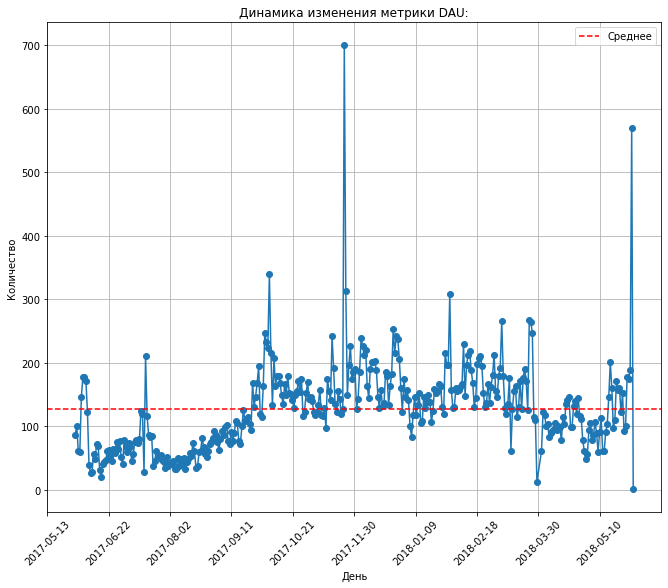

Среднее DAU: 128 пользователей


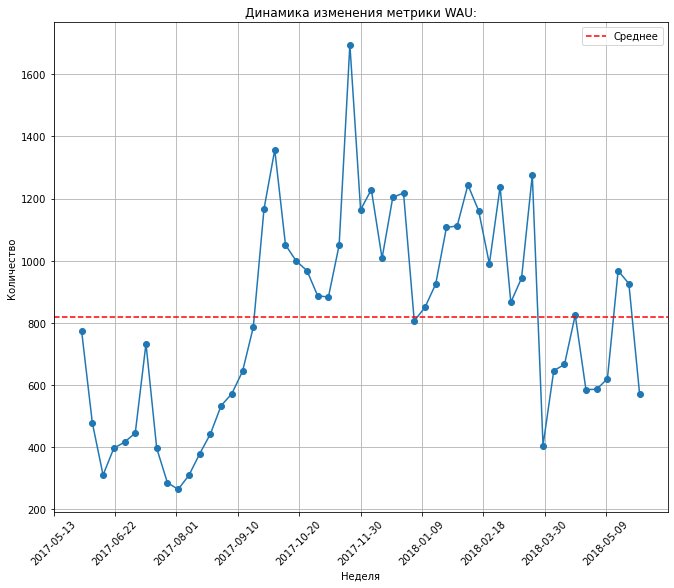

Среднее WAU: 818 пользователей


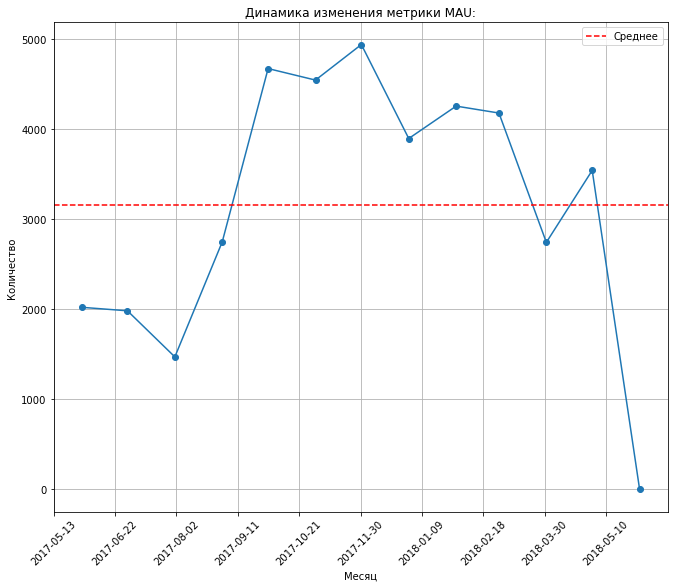

Среднее MAU: 3155 пользователей


In [25]:
def get_active_users_stat(df, groupby_col, agg_col_name):
    """
    Построение графиков для DAU, WAU, MAU
    """
#     группировка таблицы
    au_stat = orders.groupby(groupby_col).agg({'uid':'nunique'}).reset_index()
    au_stat = au_stat.rename(columns={
        'uid': agg_col_name,
        'purchase_day': groupby_col
    })
    
#     графики
    _, ax = plt.subplots(figsize=(11,9))
    plt.plot(au_stat[groupby_col], au_stat[agg_col_name], 'o-')
    plt.title('Динамика изменения метрики '+agg_col_name+':')
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start, end, (end-start)/10))
    if agg_col_name == 'DAU':
        plt.xlabel('День')
    elif agg_col_name == 'WAU':
        plt.xlabel('Неделя')
    elif agg_col_name == 'MAU':
        plt.xlabel('Месяц')
    else:
        plt.xlabel('Не определено')
    plt.ylabel('Количество')
    lmean = plt.axhline(au_stat[agg_col_name].mean(), linestyle='--', color='red')
    plt.legend((lmean,), ('Среднее',))
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()
    
#     отображение средней метрики
    print('Среднее {}:'.format(agg_col_name), '{}'.format(round(au_stat[agg_col_name]
                                                          .mean()))
                                                          ,
         'пользователей')
    return au_stat[agg_col_name].mean()

# DAU
DAU = get_active_users_stat(orders, 'purchase_day', 'DAU')
WAU = get_active_users_stat(orders, 'purchase_week', 'WAU')
MAU = get_active_users_stat(orders, 'purchase_month', 'MAU')

**Вывод**: Как видно, пользователи проявляют большую активность на сервисе с октября по март включительно (лучше всего это видно на посещении за неделю, т.к. она лучше всего соответствует периодичности посещения мероприятий людьми). Похоже, это связано с сезонностью и в теплые месяцы люди чаще выбирают прогулки и др. активность на свежем воздухе.

#### Сессий в день:

Построю гистограмму распределения для определения наиболее информативного показателя распределения:

Среднее: 901.83
Медиана: 921.0
Моды:


0     502
1     511
2    1045
3    1173
4    1411
dtype: int64

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


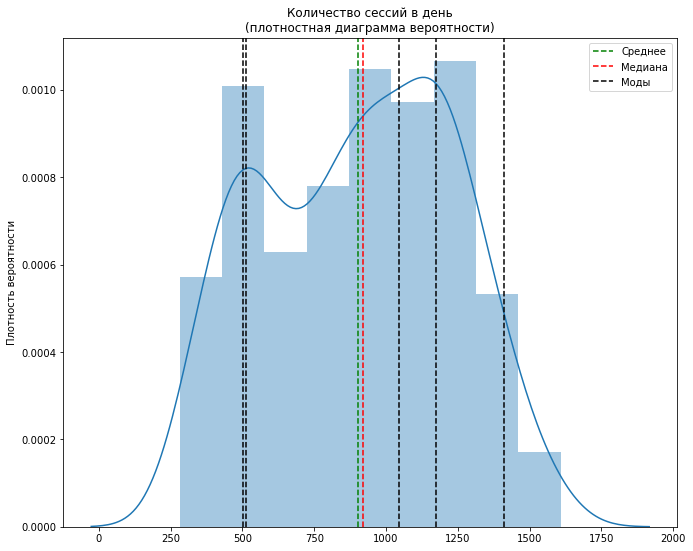

In [26]:
visits_dist = visits.groupby('session_date')['uid'].nunique()
def plot_dist(dist, title=''):
#     уберу хвосты
    dmin = dist.quantile(q=0.01)
    dmax = dist.quantile(q=0.99)
    dist = dist[(dist >= dmin)&(dist <=dmax)]
    
#     среднее
    dmean = dist.mean()
    print('Среднее:', round(dmean, 2))

#     медиана
    dmed = dist.median()
    print('Медиана:', round(dmed, 2))

#     моды
    dmodes = dist.mode()
    print('Моды:')
    display(dmodes)

#     графики
    _, ax = plt.subplots(figsize=(11,9))
    sns.distplot(dist, ax=ax)
    plt.ylabel('Плотность вероятности')
    plt.xlabel('')
    lmean = plt.axvline(dmean, color='green', linestyle='--')
    lmed = plt.axvline(dmed, color='red', linestyle='--')
    for m in dmodes:
        lmode = plt.axvline(m, color='black', linestyle='--')
    plt.title(title)
    plt.legend((lmean, lmed, lmode), ('Среднее', 'Медиана', 'Моды'))
    plt.show()
    
plot_dist(visits_dist, 'Количество сессий в день\n(плотностная диаграмма вероятности)')

Подходит медиана.

In [27]:
print('Сессий в день (медиана):')
visits.groupby('session_date').agg({'uid': 'nunique'}).median()

Сессий в день (медиана):


uid   921.00
dtype: float64

#### Сколько длится одна сессия?

Среднее: 582.69
Медиана: 300.0
Моды:


0   60.00
dtype: float64

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


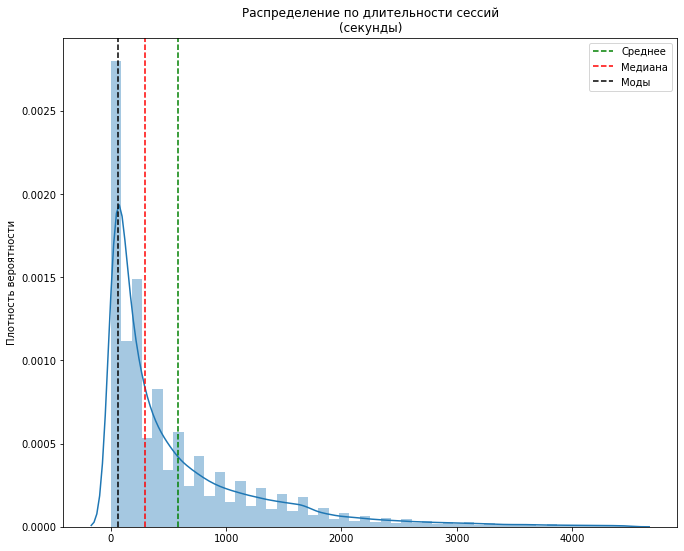

In [28]:
sess_dist = (visits.ts_end - visits.ts_start).dt.total_seconds()

plot_dist(sess_dist, 'Распределение по длительности сессий\n(секунды)')

Очевидно, наиболее информативна мода.

In [29]:
# моды
sess_dist.mode()

0   60.00
dtype: float64

In [30]:
print('Чаще всего встречается время сессии: {:.2f}'.format(
      (sess_dist.mode()[0])
),
     'секунд')

Чаще всего встречается время сессии: 60.00 секунд


**Вывод**: 60 секунд - мало для того, чтобы выбрать мероприятие, скорее всего, пользователи попадали на страницу конкретного мероприятия или соглашались приобрести билеты на главные. В любом случае налицо **проблема**, что **функционал** сервиса не использовался в полной мере.

#### Как часто люди возвращаются?

На этот вопрос отвечает метрика *retention rate*, рассчитаю её раздельно по когортам, сформированным по месяцу первой сессии пользователя.

In [31]:
# группирую данные по заказам от пользователей по когортам и месяцам жизни
users_stat1 = (orders
.groupby(['first_order_month', 'purchase_month'], as_index=False)
.agg({'uid': 'nunique'})
.rename(columns={'uid':'users'}))

In [32]:
# добавляю столбец месяца жизни явно
users_stat1['lifetime'] = (
    ((users_stat1.purchase_month - users_stat1.first_order_month) / np.timedelta64(1, 'M')
    ).round().astype('int')
)

In [33]:
# сводная таблица Коэффициента удержания пользователей
users_ret_rate = users_stat1.pivot_table(index='first_order_month',
                       columns='lifetime',
                       values='users',
                       aggfunc='sum').fillna(0)
users_ret_rate= users_ret_rate.apply(lambda x: x / x[0], axis=1)

In [34]:
# нормирование прошло успешно, удалю первый столбец
users_ret_rate.drop(columns=[0], inplace=True)

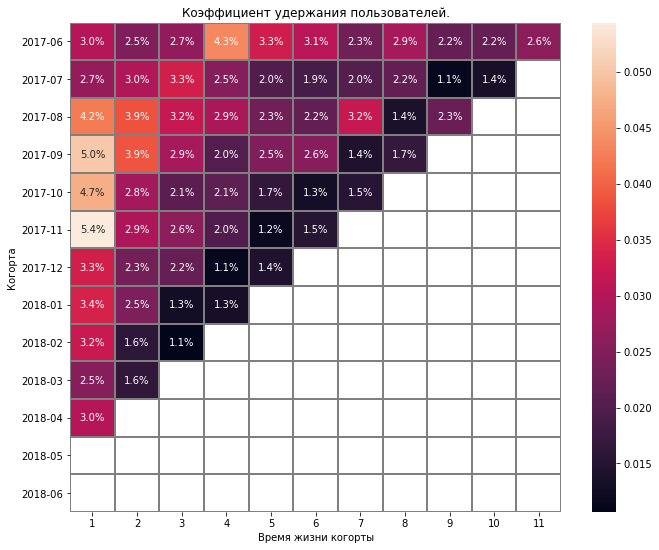

In [35]:
# тепловая карта
_, ax = plt.subplots(figsize=(11,9))
users_ret_rate.index = pd.Series(users_ret_rate.index).dt.strftime('%Y-%m')
sns.heatmap(users_ret_rate, annot=True, fmt='.1%', ax=ax,
           linecolor='gray', linewidths=1, mask=users_ret_rate==0)
plt.title('Коэффициент удержания пользователей.')
plt.xlabel('Время жизни когорты')
plt.ylabel('Когорта')
plt.show()

**Вывод:** К концу 1-го месяца жизни когорт в них остаются от 5,5 до 2,5% активных пользователей. Есть разброс по количеству между когортами, однако повышение или понижение активности пользователей *не происходит одновременно* по всем когортам (не видно явных диагоналей). **Основные проблемы** и неправильные решения заключены в **0-м месяце** когорт, стоит его изучить внимательнее.

In [36]:
# усреднение по когортам
users_ret_rate[users_ret_rate==0] = None
users_ret_rate_mean = users_ret_rate.mean()
users_ret_rate_mean = pd.DataFrame(data=[users_ret_rate_mean], columns=users_ret_rate_mean.index,
                                   index=['mean'])

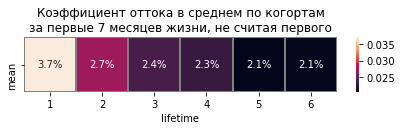

In [37]:
# усреднение по 6 и более когортам:
_, ax = plt.subplots(figsize=(7,1))
sns.heatmap(users_ret_rate_mean.iloc[:,:6], annot=True, fmt='.1%', ax=ax,
           linecolor='gray', linewidths=1)
plt.title('Коэффициент оттока в среднем по когортам\nза первые 7 месяцев жизни, не считая первого')
plt.show()

### Продажи

Найду ответы на вопросы:
- Когда люди начинают покупать?
- Сколько раз покупают за период?
- Какой средний чек?
- Сколько денег приносят? (LTV)

Для ответов на вопросы этого раздела нужно будет объединить таблицы *visits* и *orders*. Таблица *costs* здесь не понадобится.  
Т.к. в условии проекта не указана маржинальность, считаю её за 100%.

#### Для начала составлю простые соотношения по выручке.

Соотношение выручки с настольной и мобильной версий приложения


device_type
desktop   83.92
touch     16.08
Name: revenue_per_order, dtype: float64

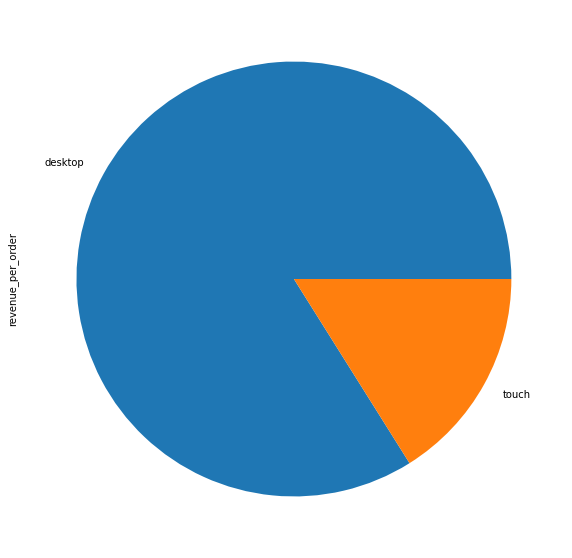

In [38]:
orders_by_dev = orders.groupby('device_type')['revenue_per_order'].sum()

print('Соотношение выручки с настольной и мобильной версий приложения')
display(orders_by_dev / orders_by_dev.sum() * 100)

_, ax = plt.subplots(figsize=(10,10))
orders_by_dev.plot(kind='pie', ax=ax)
plt.show()

**Вывод**: Выручка с мобильных устройств составляет всего 16%!, и это для сервиса *outgoing* мероприятий, явно с мобильной версией что-то не так.

#### Когда люди начинают покупать?

Для ответа на этот вопрос вычислю среднее время от начала первой сессии до первой покупки (т.к. покупка необязательно произойдёт в течение этой первой сесссии, в общем случае нужно рассмотреть и другие).

In [39]:
# получение списка первых заказов и сессий по пользователям
users_first_sessions = visits.groupby('uid')['ts_start'].min().reset_index()
users_first_sessions = (users_first_sessions
                       .rename(columns={'ts_start': 'first_session_start'}))

users_first_orders = orders.groupby('uid')['purchase_time'].min().reset_index()

# левое соединение таблиц оставляет все сессии, даже без заказов
users_first_all = users_first_sessions.merge(users_first_orders, how='left', on='uid')

users_stat = users_first_all.isnull().sum().to_frame('Количество')
users_stat['Проценты'] = users_stat['Количество'] / users_first_all.shape[0] * 100
print('Пользователи без покупок:')
display(users_stat)

Пользователи без покупок:


,Количество,Проценты
uid,0,0.00
first_session_start,0,0.00
purchase_time,191646,83.99


**Вывод:** Покупки делают лишь 16% пользователей.
##### Определю среднее время от начала первой сессии до первой покупки по этим пользователям.

In [40]:
# удаляю пользователей без покупок
users_first_all = users_first_all.dropna().reset_index(drop=True)

In [41]:
# для каждого пользователя считаю время от начала первой сессии до его первой покупки
users_first_all['time_to_purchase'] = users_first_all.purchase_time - users_first_all.first_session_start

Среднее: 630.06
Медиана: 300.0
Моды:


0   60.00
dtype: float64

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


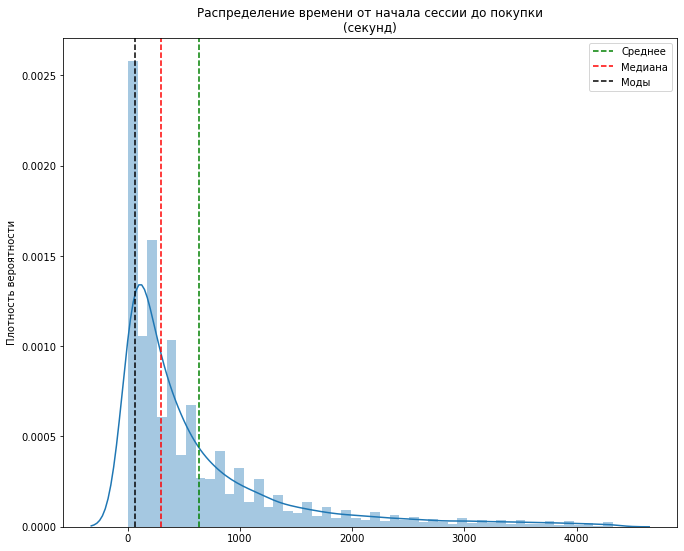

In [42]:
# построю гистограмму распределения
plot_dist(users_first_all[users_first_all['time_to_purchase'].dt.total_seconds() < 5_000]\
          ['time_to_purchase'].dt.total_seconds(),
         'Распределение времени от начала сессии до покупки\n(секунд)')

In [43]:
# моды
users_first_all.time_to_purchase.mode()

0   00:01:00
dtype: timedelta64[ns]

In [44]:
# проверка нулевых значений (возможны при округлении)
users_first_all[users_first_all.time_to_purchase == 0]['time_to_purchase'].count()

0

In [45]:
print('Наиболее распространенное время от начала сессии до покупки:',
      users_first_all.time_to_purchase.mode().dt.total_seconds()[0].round(), 'секунд')

Наиболее распространенное время от начала сессии до покупки: 60.0 секунд


**Вывод**: Среднее совпадает со средней длительностью сессии, и график практически идентичен. Выходит, пользователи совершают покупку чаще всего в первую сессию.

#### Сколько раз покупают за период?

In [46]:
users_month_orders = orders.groupby(['purchase_month', 'uid']).agg({'purchase_time': 'nunique'}).reset_index()
users_month_stat = users_month_orders.groupby('purchase_month').agg({'uid': 'nunique', 'purchase_time': 'mean'})
users_month_stat = users_month_stat.rename(columns={'uid': 'users', 'purchase_time': 'mean_sessions'})
users_month_stat

,users,mean_sessions
purchase_month,,
2017-06-01,2023,1.16
2017-07-01,1984,1.19
2017-08-01,1472,1.23
2017-09-01,2750,1.23
2017-10-01,4675,1.21
2017-11-01,4547,1.24
2017-12-01,4942,1.26
2018-01-01,3898,1.21
2018-02-01,4258,1.24


In [47]:
print('Среди тех, кто делает заказы, в среднем за месяц заказывают: {:.2f} раз'.format(users_month_stat[users_month_stat.users > 1]['mean_sessions'].mean()))

Среди тех, кто делает заказы, в среднем за месяц заказывают: 1.22 раз


**Вывод:** Количество заказов на пользователя сохраняет стабильность (от 1.16 до 1.27 в среднем в месяц), однако находится на очень низком уровне.

#### Какой средний чек (с покупателя)?

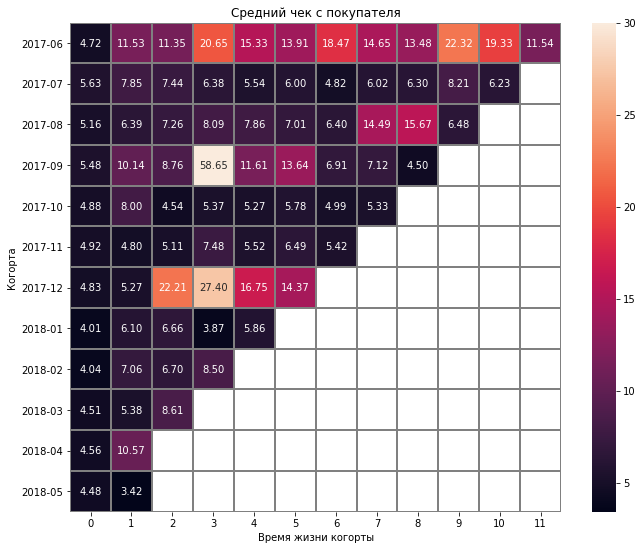

In [48]:
def display_mean_revenue(ords, vmax=None):
    """
    Тепловая карта для среднего чека с покупателя
    """
    ords_stat0 = (
        ords
        .groupby(['first_session_month', 'purchase_month'])
        .agg({'revenue_per_order': 'sum', 'uid': 'nunique'})
        .reset_index()
    )

    ords_stat0['lifetime'] = ((ords_stat0['purchase_month'] - 
                               pd.to_datetime(ords_stat0['first_session_month'])) /\
                              np.timedelta64(1, 'M')).round().astype('int')
    ords_stat0 = ords_stat0.\
    rename(columns={'revenue_per_order':'month_revenue', 'uid': 'users'})

# делю всю выручку за месяц на количество АКТИВНЫХ пользователей
    ords_stat0['mean_revenue'] = ords_stat0['month_revenue'] / ords_stat0['users']
    revenue_table = ords_stat0.pivot_table(index='first_session_month',
                                           columns='lifetime',
                                           values='mean_revenue',
                                           aggfunc='mean')

#     тепловая карта
    _, ax = plt.subplots(figsize=(11,9))
    sns.heatmap(revenue_table, annot=True, fmt='.2f', ax=ax, mask=revenue_table.isnull(),
               linecolor='gray', linewidths=1, vmax=vmax)
    plt.title('Средний чек с покупателя')
    plt.xlabel('Время жизни когорты')
    plt.ylabel('Когорта')
    plt.show()
    
display_mean_revenue(orders, vmax=30)

**Вывод**: на тепловой карте видны месяцы, когда совершались крупные покупки, но в целом средний чек при увеличении времени жизни когорты практически не меняется, имеет слабую тенденцию к увеличению почти во всех когортах.

##### Средний чек в зависимости от устройства:

In [49]:
# средний чек по устройствам:
stat_dev = (
    orders
#     группировка по устройствам и месяцам
    .groupby(['device_type', 'purchase_month'])
    .agg({'uid': 'nunique', 'revenue_per_order': 'sum'})
    .rename(columns={'uid': 'users', 'revenue_per_order': 'total_revenue'})
)

In [50]:
# выручка за каждого пользователя
stat_dev['revenue_per_user'] = stat_dev.total_revenue / stat_dev.users

In [51]:
#     группировка по устройствам, кол-во пользователей даже с одинаковым
#     uid суммируется (т.к. разные месяцы), по суммарным чекам вычисляю среднее
revenue_mean_by_dev = (stat_dev
.groupby('device_type')
    .agg({'revenue_per_user': 'mean'})
             .rename(columns={'revenue_per_user': 'mean_revenue'})
)

pd.options.display.float_format = '{:.2f} руб.'.format
print('Средний чек в зависимости от устройства:')
display(revenue_mean_by_dev)
pd.options.display.float_format = '{:.2f}'.format

Средний чек в зависимости от устройства:


,mean_revenue
device_type,
desktop,6.09 руб.
touch,5.07 руб.


**Вывод**: средний чек для пользователя компьютера больше пользователя мобильного устройства, хотя по логике, т.к. в заказе билетов важна мобильность, должно быть наоборот. Стоит повнимательнее изучить мобильную версию на предмет ошибок.

In [52]:
# расчет среднего "среднего чека"
ords_stat = (orders
            .groupby(['purchase_month'])
            .agg({'revenue_per_order': 'sum', 'uid': 'nunique'})
            .reset_index()
            .rename(columns={'revenue_per_order':'month_revenue', 'uid': 'users'}))

In [53]:
# делю выручку за месяц на количество активных пользователей в этом месяце
ords_stat['mean_revenue'] = ords_stat['month_revenue'] / ords_stat['users']

Среднее для каждого месяца считаю в соответствии с количеством активных пользователей на соответствующий месяц.

In [54]:
# Средний "средний чек"
mean_mean_revenue = round(ords_stat['mean_revenue'].mean(), 2)
print('Средний "средний чек":', mean_mean_revenue, 'руб.')

Средний "средний чек": 5.87 руб.


Т.к. это метрика роста, компании следует сравнить её со значением за предыдущие периоды, чтобы понять динамику.

##### Средний чек по нулевым срокам жизни когорт:

In [55]:
# фильтрую заказы, оставляя только на 0-е сроки жизни когорт
orders_0_lifetime = orders[orders.first_order_month == orders.purchase_month]
print('Процент заказов по нулевому сроку жизни когорт: {:.0%}'.format(
      (orders_0_lifetime.shape[0] / orders.shape[0]))
     )

Процент заказов по нулевому сроку жизни когорт: 82%


In [56]:
# статистика 
mean_revenue_0_lifetime_months = (orders_0_lifetime
                                  .groupby('first_order_month')
                                  .agg({'uid':'nunique', 'revenue_per_order': 'sum'})
                                 .rename(columns={'uid': 'users',
                                                  'revenue_per_order': 'total_revenue'}))

In [57]:
# рассчитываю средний чек по каждой когорте
mean_revenue_0_lifetime_months['mean_revenue'] = mean_revenue_0_lifetime_months.total_revenue /\
mean_revenue_0_lifetime_months.users
mean_revenue_0_lifetime_months

,users,total_revenue,mean_revenue
first_order_month,,,
2017-06-01,2023,9557.49,4.72
2017-07-01,1923,11557.65,6.01
2017-08-01,1370,7228.83,5.28
2017-09-01,2581,14568.53,5.64
2017-10-01,4340,21716.20,5.00
2017-11-01,4081,21036.26,5.15
2017-12-01,4383,20767.49,4.74
2018-01-01,3373,13949.50,4.14
2018-02-01,3651,15177.16,4.16


In [58]:
# средний чек по всем когортам (за 0-й месяц жизни)
mean_revenue_0_lifetime = mean_revenue_0_lifetime_months.mean_revenue.mean()
print('Средний чек за нулевой месяц жизни когорт', round(mean_revenue_0_lifetime, 2), 'руб.')

Средний чек за нулевой месяц жизни когорт 4.8 руб.


In [59]:
print('В среднем за нулевой месяц жизни когорт пользователи платят {:.0%} от среднего чека'.format(mean_revenue_0_lifetime / mean_mean_revenue))

В среднем за нулевой месяц жизни когорт пользователи платят 82% от среднего чека


**Вывод**: за нулевой месяц жизни когорт совершается 82% заказов на 82% от среднего чека пользователя. После этого выручка резко падает (более 5 раз суммарно за все оставшиеся месяцы).

#### Сколько денег приносят? (LTV)

In [60]:
# сгруппирую данные по когортам
cohorts_revenue_by_month = (orders
                           .groupby(['first_order_month', 'purchase_month'])
                           .agg({'revenue_per_order': 'sum'})
                           .reset_index())
cohorts_revenue_by_month = (cohorts_revenue_by_month
                           .rename(columns={'revenue_per_order': 'revenue'}))

In [61]:
# размеры когорт
cohort_sizes = (orders
               .groupby('first_order_month')
               .agg({'uid': 'nunique'})
               .reset_index()
               .rename(columns={'uid': 'cohort_users'}))

In [62]:
# ltv на каждый месяц:
cohorts_revenue_by_month = cohorts_revenue_by_month.merge(cohort_sizes,
                                                          on='first_order_month',
                                                          how='left')

In [63]:
# вычислю LTV
cohorts_revenue_by_month['ltv'] = cohorts_revenue_by_month['revenue'] /\
cohorts_revenue_by_month['cohort_users']
# вычислю месяц для каждого заказа по когорте
cohorts_revenue_by_month['lifetime'] = \
((cohorts_revenue_by_month['purchase_month'] - 
  pd.to_datetime(cohorts_revenue_by_month['first_order_month'])) /\
 np.timedelta64(1, 'M')).round().astype('int')

In [64]:
# сводная таблица LTV
LTV_per_cohort = (cohorts_revenue_by_month
                  .pivot_table(index='first_order_month', columns='lifetime',
                               values='ltv', aggfunc='mean')
                 )
LTV_per_cohort = LTV_per_cohort.cumsum(axis=1)
LTV_per_cohort.index = pd.Series(LTV_per_cohort.index).dt.strftime('%Y-%m')

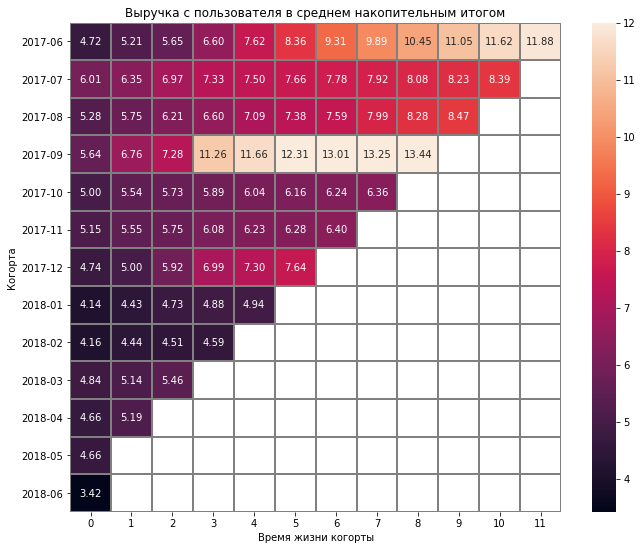

In [65]:
# тепловая карта по LTV
_, ax = plt.subplots(figsize=(11,9))
sns.heatmap(LTV_per_cohort, annot=True, fmt='.2f', ax=ax, linecolor='gray', linewidths=1, vmax=12)
ax.set_title('Выручка с пользователя в среднем накопительным итогом')
ax.set_ylabel('Когорта')
ax.set_xlabel('Время жизни когорты')
plt.show()

In [66]:
print('LTV за первые 6 месяцев: {:.2f} руб.'.format(LTV_per_cohort.mean(axis=0)[5]))

LTV за первые 6 месяцев: 7.97 руб.


**Вывод**: первая когорта явно лидирует, общие темпы увеличения LTV там выше. Её догоняет когорта сентября 2017, но лишь за счет покупок в третьем месяце жизни (декабрь 2017). Возможно, менеджер по первоналу компании оформил все билеты для сотрудников на свой аккаунт. К тому же это происходит в декабре, похоже на новогодний корпоратив.
Но другие когорты явно отстают, ситуация удручающая.

#### Изменение во времени выручки по устройствам

In [67]:
orders_stat_by_month = orders.groupby(['purchase_month', 'device_type'])['revenue_per_order'].sum().unstack()

In [68]:
orders_stat_by_month = orders_stat_by_month.fillna(0)

In [69]:
print('Соотношение выручки по устройствам')
orders_stat_by_month

Соотношение выручки по устройствам


device_type,desktop,touch
purchase_month,,
2017-06-01,8172.04,1385.45
2017-07-01,9829.05,2710.42
2017-08-01,7277.47,1481.31
2017-09-01,15801.84,2543.67
2017-10-01,23031.27,4956.43
2017-11-01,21428.21,5641.72
2017-12-01,32575.33,3813.27
2018-01-01,16180.57,3236.56
2018-02-01,21844.99,3715.55


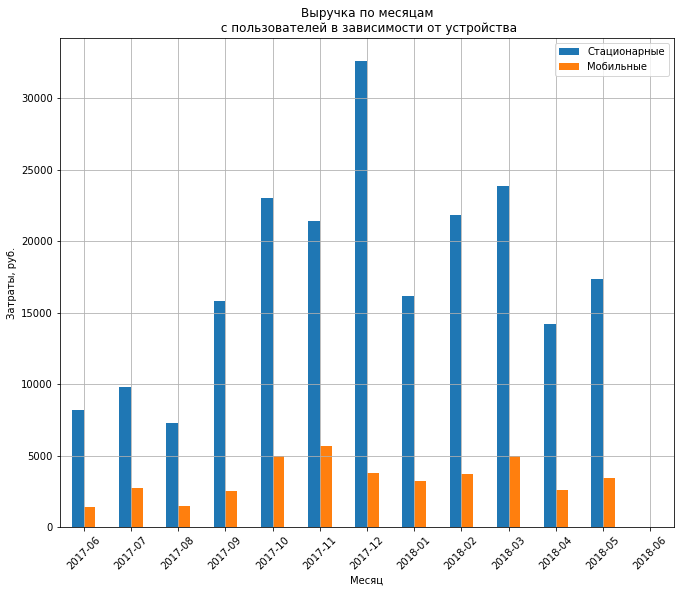

In [70]:
_, ax = plt.subplots(figsize=(11,9))
orders_stat_by_month.index = pd.to_datetime(orders_stat_by_month.index).strftime('%Y-%m')
orders_stat_by_month.plot(kind='bar', ax=ax)
plt.legend(('Стационарные', 'Мобильные'))
plt.title('Выручка по месяцам\n с пользователей в зависимости от устройства')
plt.xlabel('Месяц')
plt.ylabel('Затраты, руб.')
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Вывод:** явные проблемы с мобильной версией.

### Маркетинг
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько стоило привлечение одного покупателя из каждого источника?
- На сколько окупились расходы? (ROMI)
- Отобразите на графиках, как эти метрики отличаются по устройствам и по рекламным источникам? Как они меняются во времени?

#### Сколько денег потратили? Всего / на каждый источник / по времени

Всего:

In [71]:
print('Потратили всего: {:.2f} руб.'.format(costs.cost_per_day.sum()))

Потратили всего: 329131.62 руб.


Общее соотношение затрат по источникам:

In [72]:
costs_per_sources = costs.groupby('id_source').cost_per_day.sum()
for i in [6,7,8]:
    costs_per_sources.loc[i] = 0
costs_per_sources = costs_per_sources.sort_index()

costs_per_sources

id_source
1     20833.27
2     42806.04
3    141321.63
4     61073.60
5     51757.10
6         0.00
7         0.00
8         0.00
9      5517.49
10     5822.49
Name: cost_per_day, dtype: float64

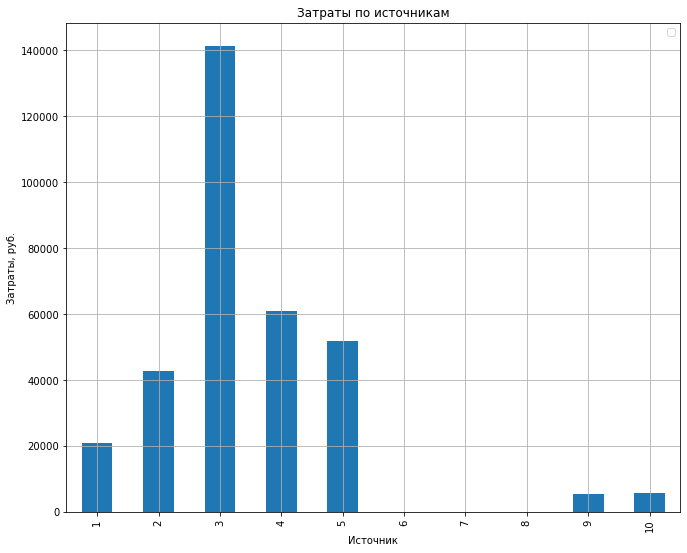

In [73]:
# график затрат по источникам
fig, ax = plt.subplots(figsize=(11,9))
costs_per_sources.plot(kind='bar', ax=ax)
plt.title('Затраты по источникам')
plt.xlabel('Источник')
plt.ylabel('Затраты, руб.')
plt.legend('')
plt.grid()
plt.show()

**Вывод:** 3 источник - лидер по затратам, на 9, 10 что-то тратится, но меньше других, а 6-8 источники вообще не используются.

#### По времени:

In [74]:
# сводная таблица по месяцам
costs['date_month'] = costs['date'].dt.strftime('%Y-%m')

In [75]:
costs_stat = costs.groupby(['date_month','id_source'])['cost_per_day'].sum().reset_index()

In [76]:
costs_table = costs_stat.pivot_table(index='date_month', 
                                     columns='id_source',
                                     values='cost_per_day',
                                     aggfunc='sum')

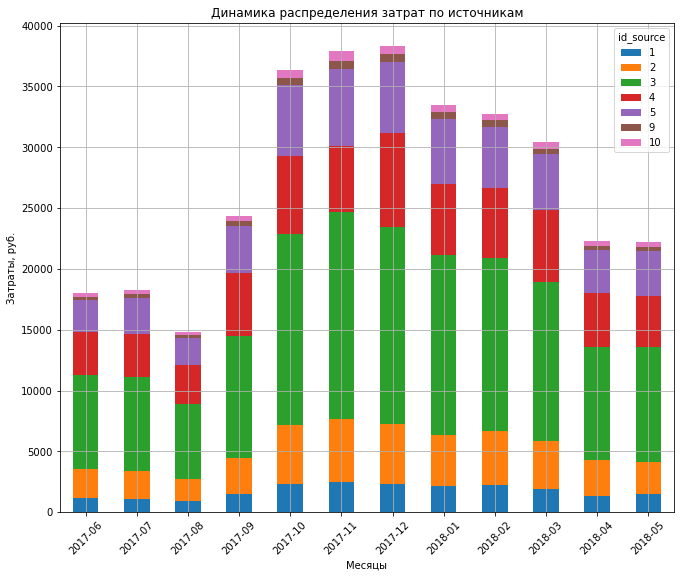

In [77]:
# график
_, ax = plt.subplots(figsize=(11,9))
costs_table.plot(kind='bar', stacked=True, ax=ax)
plt.title('Динамика распределения затрат по источникам')
plt.xlabel('Месяцы')
plt.ylabel('Затраты, руб.')
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Вывод**: менялись затраты в целом по источникам, наибольшие были в октябре - декабре 2017, наиеньшие - в июне-августа 2017, а соотношение по источникам оставалось приблизительно одинаковым. На графике виден довольно большой разброс по суммарным затратам, среднее квадратическое отклонение равно 8405 руб. или 31% от среднего.

##### Рассчитаю среднее квадратическое отклонение:

In [78]:
costs_total_by_month = costs.groupby('costs_month').agg({'cost_per_day': 'sum'})

Среднее:

In [79]:
costs_mean_by_month = costs_total_by_month.mean().values[0]

In [80]:
costs_std = (costs_total_by_month.cost_per_day.std())

In [81]:
print('Среднее квадратическое отклонение суммарных затрат по месяцам:', costs_std, 'руб.')
print('В процентах от среднего: {:.0%}'.format(costs_std / costs_mean_by_month))

Среднее квадратическое отклонение суммарных затрат по месяцам: 8405.071206674194 руб.
В процентах от среднего: 31%


#### Сколько стоило привлечение одного покупателя из каждого источника?

In [82]:
# таблица по месяцам первых заказов пользователей для формирования размера когорт
users_first_orders_months = (orders
                            .sort_values(by='purchase_time', ascending=True)
                            .groupby('uid', as_index=False)
                            .agg({'purchase_month':'first'})
                            .rename(columns={'purchase_month': 'first_order_month',
                                   })
                            )

In [83]:
# определение источника каждого пользователя
users_sources = (visits
                .sort_values(by='ts_start')
                .groupby('uid', as_index=False)
                .agg({'id_source': 'first'}))

In [84]:
# соединение таблиц, теперь для каждого пользователя известна его когорта и источник
users_orders_info = users_first_orders_months.merge(users_sources, on='uid', how='left')

In [85]:
# проверка, по всем ли пользователям нашлись источники
users_orders_info.isnull().sum()
# всё ок

uid                  0
first_order_month    0
id_source            0
dtype: int64

In [86]:
# определение размера когорт
users_cohort_size_by_order = (users_orders_info
                                .groupby(['first_order_month', 'id_source'], as_index=False)
                                .agg({'uid': 'nunique'})
                                .rename(columns={'uid': 'users'}))

In [87]:
costs_table_by_month = (costs
                       .groupby(['costs_month', 'id_source'], as_index=False)
                       .agg({'cost_per_day': 'sum'})
                       .rename(columns={'cost_per_day': 'cost_per_month'}))

In [88]:
# объединяю таблицы
sources_table_by_month = users_cohort_size_by_order.merge(costs_table_by_month, left_on=['first_order_month', 'id_source'],
                                right_on=['costs_month', 'id_source'], how='outer')

In [89]:
# проверка
sources_table_by_month.isnull().sum()

first_order_month    0
id_source            0
users                0
costs_month          2
cost_per_month       2
dtype: int64

По 2-м пользователям источники не определились, удаляю их

In [90]:
sources_table_by_month.dropna(inplace=True)

In [91]:
# расчет затрат на покупателя
sources_table_by_month['cac'] = sources_table_by_month.cost_per_month / sources_table_by_month.users

Группирую по источникам, нахожу среднее CAC:

In [92]:
cac_pivot_by_source = sources_table_by_month.pivot_table(index='costs_month',
                                                        columns='id_source',
                                                        values='cac',
                                                        aggfunc='mean')
cac_pivot_by_source.T

costs_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
id_source,,,,,,,,,,,,
1,5.92,6.71,8.42,6.62,6.81,7.55,7.07,9.19,8.02,6.74,7.42,6.09
2,10.33,11.22,14.72,13.51,12.23,13.19,12.86,14.24,15.27,11.70,14.26,6.53
3,12.12,14.99,18.23,12.76,13.66,14.00,12.32,14.72,13.03,13.64,15.02,11.15
4,8.51,6.83,9.52,8.80,5.48,4.58,5.58,5.65,5.16,5.52,6.41,5.24
5,6.81,7.09,6.07,6.54,6.10,9.13,7.62,8.49,7.48,8.58,8.14,7.38
9,4.19,5.82,4.08,4.78,4.84,4.71,5.44,6.84,6.57,2.98,8.69,6.04
10,3.31,6.47,6.29,5.36,3.00,6.19,7.60,6.68,3.91,2.83,3.63,3.15


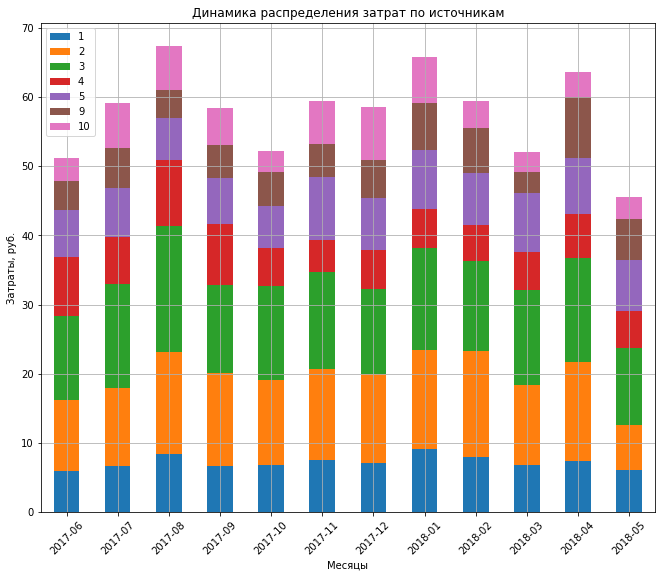

In [93]:
# график
_, ax = plt.subplots(figsize=(11,9))
cac_pivot_by_source.index = pd.Series(cac_pivot_by_source.index).dt.strftime('%Y-%m')
cac_pivot_by_source.plot(kind='bar', stacked=True, ax=ax)
plt.title('Динамика распределения затрат по источникам')
plt.xlabel('Месяцы')
plt.ylabel('Затраты, руб.')
plt.xticks(rotation=45)
plt.grid()
plt.legend(loc='upper left')
plt.show()

Вычисление стандартного отклонения и среднего cac по источникам

In [94]:
sources_std_stat = cac_pivot_by_source.std().to_frame('std').join(cac_pivot_by_source.mean().to_frame('mean'))

In [95]:
# добавление столбца с процентом отклонения
sources_std_stat['% отклонения'] = sources_std_stat['std'] / sources_std_stat['mean'] * 100
sources_std_stat = sources_std_stat.sort_values(by='% отклонения', ascending=False)

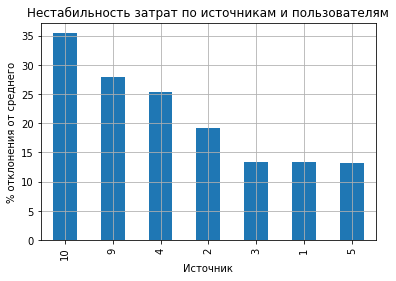

In [96]:
# графическое представление
sources_std_stat['% отклонения'].plot(kind='bar')
plt.title('Нестабильность затрат по источникам и пользователям')
plt.ylabel('% отклонения от среднего')
plt.xlabel('Источник')
plt.grid()
plt.show()

In [97]:
print('Средние затраты на привлечение пользователя', round(cac_pivot_by_source.mean().mean(), 2), 'руб.')

Средние затраты на привлечение пользователя 8.24 руб.


**Вывод**: Самый нестабильный источник - 10-й с 35% отклонения по затратам, самые стабильные - 1, 3, 5 - около 15%.  
Разброс расходов исходя из одного пользователя значительно меньше, чем в целом за месяц, и там, где расходы в целом были ниже, расход на пользователя несколько больше, а при макс. расходах - расход на привлечение средний. Вывод - нужно тратить деньги на привлечение большего количества пользователей, т.к. каждый в отдельности в этом случае стоит меньше.

### Насколько окупились расходы? (ROMI)

Посмотрю на общий баланс за всё время:

In [98]:
# Все доходы - себестоимость = валовая прибыль
balance = orders.revenue_per_order.sum() - costs.cost_per_day.sum()
print('Валовая прибыль равна:', round(balance, 2))

Валовая прибыль равна: -77074.42


Сразу видно, что сервис в целом не окупается.

[Ранее](#Сколько-денег-приносят?-(LTV)) я рассчитал LTV среди первых 6 когорт - с июня по декабрь 2017 включительно. Эта сумма составила 7.97 руб. Рассчитаю CAC аналогично за те же месяцы:

In [99]:
# объединяю таблицы затрат и количества пользователей в когортах
costs_table_merged = costs_table_by_month.merge(users_cohort_size_by_order, left_on=['costs_month','id_source'],
                           right_on=['first_order_month', 'id_source'], how='left')

In [100]:
# Проверка
costs_table_merged.isnull().sum()
# ок

costs_month          0
id_source            0
cost_per_month       0
first_order_month    0
users                0
dtype: int64

In [101]:
# вычисляю сас
costs_table_merged['cac'] = costs_table_merged.cost_per_month / costs_table_merged.users

In [102]:
# фильтрация за первые 6 месяцев
cac_by_month = (costs_table_merged
[['2017' in ind for ind in costs_table_merged.costs_month.dt.strftime('%Y-%m')]]
.groupby('costs_month')
.agg({'cac' : 'mean'}))
cac_by_month

,cac
costs_month,
2017-06-01,7.31
2017-07-01,8.44
2017-08-01,9.62
2017-09-01,8.34
2017-10-01,7.45
2017-11-01,8.48
2017-12-01,8.35


In [103]:
# расчет ROMI
LTV = 7.97
CAC = cac_by_month.mean().values[0]
print('CAC = ', round(CAC, 2))

ROMI = LTV / CAC
print('ROMI на данный момент составляет: {:.0%}'.format(ROMI))

CAC =  8.28
ROMI на данный момент составляет: 96%


**Вывод:** за полгода затраты окупаются на 96%. Но это только себестоимость - маркетинговые затраты. По операционной прибыли, понятно, всё будет хуже и это неудовлетворительные результаты.

#### Статистика по источникам привлечения пользователей:

##### LTV по источникам:

In [104]:
# сопоставляю заказы и источники
orders_s = orders.merge(users_sources, how='left', on='uid')

In [105]:
# проверка, для всех ли строк есть данные?
orders_s.isnull().sum()
# ок!

purchase_time          0
revenue_per_order      0
uid                    0
purchase_day           0
purchase_week          0
purchase_month         0
first_session_date     0
first_session_month    0
device_type            0
first_order_month      0
id_source              0
dtype: int64

In [106]:
# расчет размеров групп по источникам
groups_sizes_sources = (orders_s
                       .groupby('id_source', as_index=False)
                       .agg({'uid':'nunique'}))

In [107]:
# суммарная выручка по каждому источнику
orders_stat_month_sources = (
    orders_s
    .groupby(['id_source'])
    .agg({'revenue_per_order': 'sum'})
    .rename(columns={'revenue_per_order':'revenue_per_source'})
    .reset_index()
)

In [108]:
# расчет средней выручки с пользователя
orders_stat_month_sources = (orders_stat_month_sources
                            .merge(groups_sizes_sources, on='id_source', how='left')
                            .rename(columns={'uid': 'users'}))

In [109]:
# ltv
orders_stat_month_sources['ltv'] = orders_stat_month_sources.revenue_per_source /\
orders_stat_month_sources.users
orders_stat_month_sources.sort_values(by='ltv', ascending=False, inplace=True)
orders_stat_month_sources[['id_source','ltv']]

,id_source,ltv
1,2,13.38
0,1,10.72
4,5,7.59
3,4,5.51
6,9,5.29
2,3,5.20
7,10,3.35
5,7,1.22


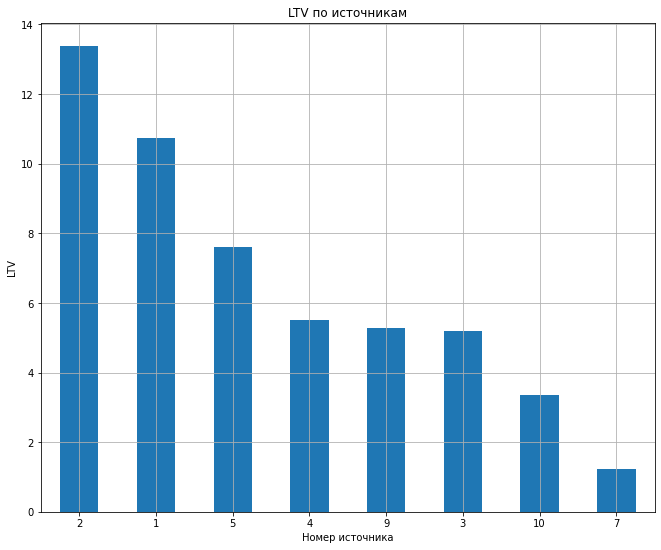

In [110]:
# график
_, ax = plt.subplots(figsize=(11,9))
orders_stat_month_sources.set_index('id_source').ltv.plot(kind='bar')
plt.title('LTV по источникам')
plt.ylabel('LTV')
plt.xlabel('Номер источника')
plt.xticks(rotation=0)
plt.grid()
plt.show()

In [111]:
print('Среднее ltv по источникам за всё время:', round(orders_stat_month_sources.iloc[:,-1].mean(), 2))

Среднее ltv по источникам за всё время: 6.53


**Вывод**: видно, что больше всего прибыли с пользователя приносят 2 и 1 источники, 7-й в аутсайдерах. Рассчитаю CAC.

##### CAC по источникам:

In [112]:
# собираю таблицу затрат по источникам
costs_month_stat = (
    costs
    .groupby('id_source', as_index=False)
    .agg({'cost_per_day': 'sum'})
    .rename(columns={'cost_per_day': 'cost_per_source'})
)

Расчет сас

In [113]:
cac_sources = (
    costs_month_stat
    .merge(groups_sizes_sources, on='id_source')
    .rename(columns={'uid':'users'})
)

In [114]:
cac_sources['cac'] = cac_sources.cost_per_source / cac_sources.users
cac_sources = cac_sources.loc[:,['id_source', 'cac']]
cac_sources.sort_values(by='cac', ascending=False, inplace=True)

,id_source,cac
2,3,13.49
1,2,12.21
4,5,7.47
0,1,7.19
3,4,5.93
5,9,5.07
6,10,4.38


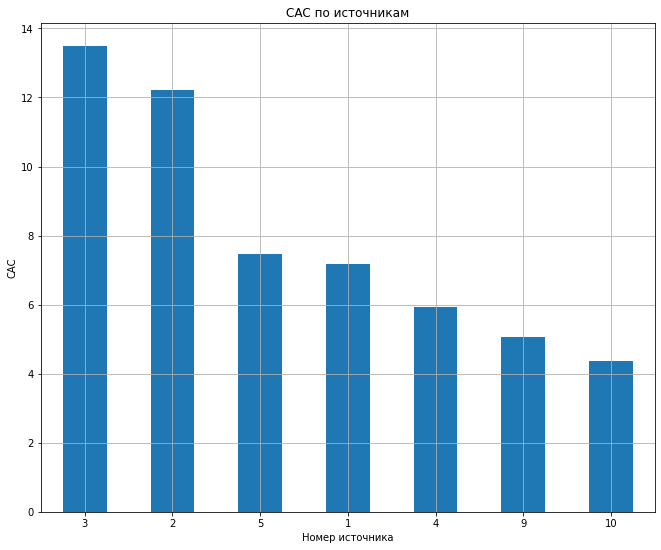

In [115]:
display(cac_sources)
_, ax = plt.subplots(figsize=(11,9))
cac_sources.set_index('id_source').cac.plot(kind='bar')
plt.title('CAC по источникам')
plt.ylabel('CAC')
plt.xlabel('Номер источника')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**Вывод**: видно, что затраты больше всего на 3-й источник, который не был в лидерах по прибыли с пользователя. Уже сейчас, до расчета ROMI, видно, что с ним явно проблемы.

##### Рассчитаю ROMI по источникам.

In [116]:
# расчет romi
romi_sources = (
    orders_stat_month_sources[['id_source', 'ltv']].merge(cac_sources, on='id_source')
    .set_index('id_source')
)
romi_sources['romi'] = romi_sources.ltv / romi_sources.cac
romi_sources = romi_sources.drop(columns=['cac', 'ltv'])
romi_sources.sort_values(by='romi', ascending=False, inplace=True)


,romi
id_source,
1,1.49
2,1.10
9,1.04
5,1.02
4,0.93
10,0.76
3,0.39


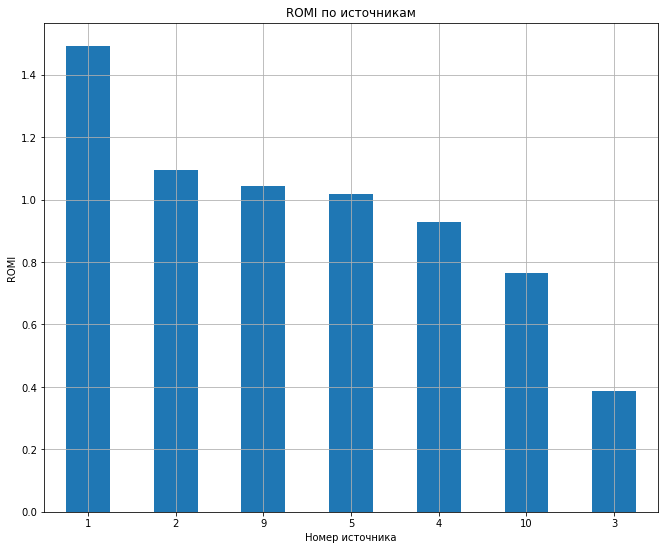

In [117]:
display(romi_sources)
_, ax = plt.subplots(figsize=(11,9))
romi_sources.romi.plot(kind='bar')
plt.title('ROMI по источникам')
plt.ylabel('ROMI')
plt.xlabel('Номер источника')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**Вывод**: лучше всего окупается 1 источник, хуже всего 3. Стоит разобраться, что такое есть в 1-м, и чего нет в 10 и особенно 3-м для увеличения прибыли.

#### Рассмотрю, как метрики различаются по устройствам:

##### Статистика по устройствам:

In [118]:
# сопоставление пользователей и устройств, с которых они впервые зашли на сервис
users_devs = (
    orders
    .sort_values(by='purchase_time', ascending=True)
    .groupby('uid', as_index=False)
    .agg({'device_type': 'first'})
)

In [119]:
# размеры групп пользователей по устройствам входа
groups_sizes_devs = (
    users_devs
    .groupby('device_type', as_index=False)
    .agg({'uid': 'nunique'})
    .rename(columns={'uid': 'users'})
)
print('Размеры групп пользователей по устройствам входа:')
groups_sizes_devs

Размеры групп пользователей по устройствам входа:


,device_type,users
0,desktop,29222
1,touch,7301


##### LTV по устройствам:

In [120]:
# статистика по заказам и выручке
orders_stat_month_devs = (
    orders
    .groupby('device_type')
    .agg({'revenue_per_order': 'sum'})
    .rename(columns={'revenue_per_order':'revenue_per_device'})
    .reset_index()
)

In [121]:
# расчет LTV
orders_stat_month_devs = (
    orders_stat_month_devs
    .merge(groups_sizes_devs, on='device_type', how='left')
)

In [122]:
orders_stat_month_devs['ltv'] = orders_stat_month_devs.revenue_per_device /\
orders_stat_month_devs.users

,device_type,ltv
0,desktop,7.24
1,touch,5.55


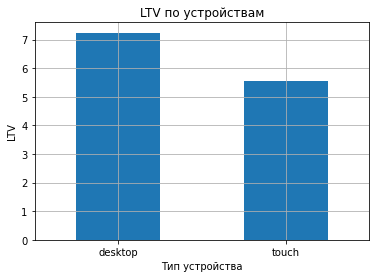

In [123]:
# графический результат
display(orders_stat_month_devs[['device_type', 'ltv']])
_, ax = plt.subplots()
orders_stat_month_devs.set_index('device_type').ltv.plot(kind='bar')
plt.title('LTV по устройствам')
plt.ylabel('LTV')
plt.xlabel('Тип устройства')
plt.xticks(rotation=0)
plt.grid()
plt.show()

In [124]:
print('Среднее ltv по устройствам за всё время:', round(orders_stat_month_devs.ltv.mean(), 2))

Среднее ltv по устройствам за всё время: 6.39


##### CAC по устройствам.  
Рассчитаю через данные по источникам, определив долю устройства в каждом источнике по первому, с которого заходил пользователь и имеющимся данным по затратам на источники.

In [125]:
# сколько было заходов с каждого типа устройств в каждый месяц
source_dev_stat = (
    orders_s
    .groupby(['first_order_month', 'id_source', 'device_type'], as_index=False)
    .agg({'uid': 'nunique'})
    .rename(columns={'uid': 'users'}))

In [126]:
# суммарное количество пользователей по источникам каждый месяц
users_sum_devs_by_sources = (source_dev_stat
                                    .groupby(['first_order_month', 'id_source'])['users']
                                    .sum())

In [127]:
# подготовка к расчету процента устройств
source_dev_stat = (source_dev_stat
                   .merge(users_sum_devs_by_sources, on=['first_order_month', 'id_source'],
                          how='left', suffixes=('', '_sum_devs')))

In [128]:
# расчет процента устройств для каждого источника и месяца
source_dev_stat['dev_pct'] = source_dev_stat.users / source_dev_stat.users_sum_devs

In [129]:
# удаление ненужных колонок
source_dev_pct_by_month = source_dev_stat.drop(columns=['users', 'users_sum_devs'])

In [130]:
# переименование колонок, приведение типов
costs_stat = costs_stat.rename(columns={'cost_per_day': 'cost_per_month'})
costs_stat.date_month = costs_stat.date_month.astype('datetime64[M]')

In [131]:
# объединение таблиц
source_dev_pct_by_month = source_dev_pct_by_month.merge(costs_stat, right_on=['date_month', 'id_source'], 
                              left_on=['first_order_month', 'id_source'], how='left')

In [132]:
# проверка
source_dev_pct_by_month.isnull().sum()

first_order_month    0
id_source            0
device_type          0
dev_pct              0
date_month           2
cost_per_month       2
dtype: int64

In [133]:
# 2 пользователя заблудились, удалю)
source_dev_pct_by_month.dropna(inplace=True)

In [134]:
# разделение затрат по устройствам на каждый месяц
source_dev_pct_by_month['cost_per_dev'] = source_dev_pct_by_month.cost_per_month *\
source_dev_pct_by_month.dev_pct

In [135]:
# проверка общих затрат
costs.cost_per_day.sum() == source_dev_pct_by_month.cost_per_dev.sum()

True

In [136]:
# общие затраты на устройства
dev_costs = (source_dev_pct_by_month
                        .groupby('device_type')
                        .cost_per_dev.sum()
                       )

In [137]:
# проверка
costs.cost_per_day.sum() == dev_costs.sum()

True

In [138]:
# проверка
orders.uid.nunique() == groups_sizes_devs.users.sum()

True

In [139]:
# расчет cac для устройств
cac_per_dev = (dev_costs
              .to_frame('cost_per_dev')
              .merge(groups_sizes_devs.set_index('device_type'),
                     left_index=True, right_index=True, how='left'))
cac_per_dev['cac'] = cac_per_dev.cost_per_dev / cac_per_dev.users
cac_per_dev = cac_per_dev[['cac']]
cac_per_dev

,cac
device_type,
desktop,9.07
touch,8.79


##### Рассчитаю ROMI по устройствам.

In [140]:
# подготовка таблицы LTV
ltv_devs = orders_stat_month_devs[['device_type', 'ltv']].set_index('device_type')

In [141]:
romi_devs = (
    ltv_devs.merge(cac_per_dev, left_index=True, right_index=True)
)

In [142]:
# расчет ROMI
romi_devs['romi'] = romi_devs.ltv / romi_devs.cac
romi_devs.drop(columns=['ltv', 'cac'], inplace=True)

,romi
device_type,
desktop,0.80
touch,0.63


<ipython-input-143-604a5e3941a6>:11: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend((l,), labels=('Порог окупаемости',))


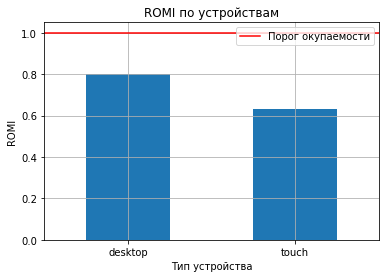

In [143]:
# ROMI по устройствам:
display(romi_devs)
_, ax = plt.subplots()
romi_devs.romi.plot(kind='bar')
plt.title('ROMI по устройствам')
plt.ylabel('ROMI')
plt.xlabel('Тип устройства')
plt.xticks(rotation=0)
l = plt.axhline(1, color='r')
# plt.xlim(0,1.1)
plt.legend((l,), labels=('Порог окупаемости',))
plt.grid()
plt.show()

**Вывод**: если смотреть ROMI по устройствам, окупаемости не достигает ни один тип. Всё потому, что вместе с окупаемыми источниками статистика считается и по неокупаемым.

#### ROMI по когортам, сформированным по месяцу первой покупки:

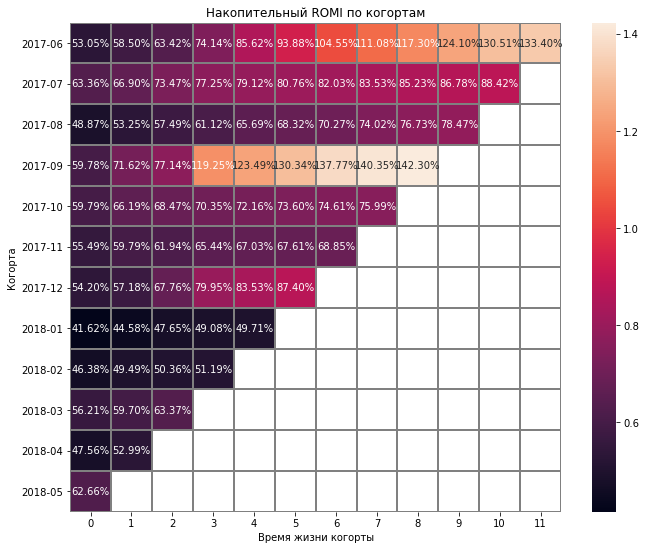

In [144]:
# определение параметров
paramstr=''
costs_pct=1
vmax=None
#     статистика по затратам
costs_stat = costs.groupby(['costs_month'])\
.agg({'cost_per_day': 'sum'})\
.rename(columns={'cost_per_day':'costs'})\
.reset_index()
costs_stat['costs'] = costs_stat['costs'] * costs_pct

#   статистика по заказам
orders_stat = orders.groupby(['first_order_month', 'purchase_month'])\
.agg({'revenue_per_order': 'sum'}).reset_index()
orders_stat = orders_stat.rename(columns={'revenue_per_order':'cohort_month_revenue'})

orders_stat['lifetime'] = ((orders_stat['purchase_month'] \
                          - pd.to_datetime(orders_stat['first_order_month'])) /\
                         np.timedelta64(1, 'M')).round().astype('int')
#     объединение таблиц
stat = orders_stat.merge(costs_stat, how='outer', 
                       left_on='first_order_month', 
                       right_on='costs_month')

stat['ROMI'] = stat['cohort_month_revenue'] / stat['costs']

ROMI_stat = stat.pivot_table(index='first_order_month',
                            columns='lifetime',
                            values='ROMI',
                            aggfunc='mean').cumsum(axis=1)
ROMI_stat.index = pd.Series(ROMI_stat.index).dt.strftime('%Y-%m')
_, ax = plt.subplots(figsize=(11,9))
sns.heatmap(ROMI_stat, annot=True, fmt='.2%', ax=ax,
           linecolor='gray', linewidths=1, vmax=vmax)
ax.set_title('Накопительный ROMI по когортам'+paramstr)
ax.set_xlabel('Время жизни когорты')
ax.set_ylabel('Когорта')
plt.show()

Усредню данные за первые 6 месяцев (6 и более когорт):

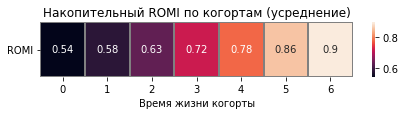

In [145]:
ROMI_mean_6 = ROMI_stat.mean()[:7].to_frame('ROMI').T
_, ax = plt.subplots(figsize=(7,1))
sns.heatmap(ROMI_mean_6, annot=True, linewidths=1, linecolor='gray',)
plt.title('Накопительный ROMI по когортам (усреднение)')
plt.xlabel('Время жизни когорты')
plt.yticks(rotation=0)
plt.show()

**Вывод**: первая когорта окупилась к 7-му месяцу жизни. Остальные к этому времени не окупились, кроме когорты сентября 2017, LTV которой резко возросло за счет отдельных больших покупок, это случайность, а не закономерность, и на неё полагаться нельзя.
В целом видно, что после первой когорты произошло ухудшение окупаемости, возможно, были отменены выгодные условия или в игру вступил конкурент.

## Шаг 3. Вывод

### Исходные данные:  
Для исследования были предоставлены данные о сессиях, покупках и затратах на сервисе "Афиши" с июня 2017 по май 2018.

Предоставленные данные в целом корректны, за исключением формата временных меток и дат.

Я проверил корректность данных, применил когортный анализ, разделив на когорты по месяцу первой сессии, рассчитал необходимые метрики.

### Полученные выводы:
Сессий в день в среднем - 921. Среднее время от первого посещения сервиса до первой покупки совпадает со средней длительностью сессии, и график практически идентичен. Выходит, пользователи совершают покупку чаще всего в первую сессию.

Пользователи проявляют большую активность на сервисе с октября по март включительно (лучше всего это видно на посещении за неделю, т.к. она лучше всего соответствует периодичности посещения мероприятий людьми). Похоже, это связано с сезонностью и в теплые месяцы люди чаще выбирают прогулки и др. активность на свежем воздухе. С этим нужно смириться, т.к. на сезонность мы повлиять не можем.

#### Продажи:  
За месяц формирования когорт совершается 82% заказов на 82% от среднего чека пользователя. После этого выручка резко падает (более 5 раз за все оставшиеся месяцы).

Наиболее распространенное время от начала сессии до покупки - 1 минута. Довольно быстро, пользователи **покупали не просматривая афишу**, либо уже знали, что им нужно, либо им подходило то, что было на главной странице. В любом случае, похоже, в подавляющем большинстве случаев функционал сервиса *не использовался в полной мере*.

Первая когорта окупилась к 7-му месяцу жизни, остальные, за исключением когорты сентября 2017 (видимо, из-за отдельных больших покупок), показывают результаты хуже, ситуация ухудшилась, возможно, компания отменила какие-то выгодные условия, и сервис стал не столь привлекателен для пользователей и они ушли к конкурентам?

Количество заказов в среднем в месяц на пользователя сохраняет стабильность (от 1.16 до 1.27), однако находится на *очень низком уровне*.

Средний чек в по мобильным устройствам чуть ниже, чем для стационарных (5.07 руб. против 6.09 руб.), но ***гораздо хуже, что*** доля выручки с мобильных устройств составляет **всего 16%**, и это для сервиса *outgoing* мероприятий, для которых важна мобильность, явно с мобильной версией что-то не так.

#### Затраты:  
Менялись затраты в целом по источникам, наибольшие были в октябре - декабре 2017, наименьшие - в июне-августе 2017, а соотношение по источникам оставалось приблизительно одинаковым.

Самый нестабильный источник - 10-й с 35% отклонения по затратам, самые стабильные - 1, 3, 5 - около 15%.

Самые большие затраты были с октября по март включительно, однако в расчете на одного пользователя эти затраты получаются средними. Влияет опять же сезонность.

***3 источник - лидер по затратам***, на 9, 10 что-то тратится, но меньше других, а 6-8 источники вообще не используются.

#### Окупаемость:  
За ***полгода*** затраты окупаются в среднем на 96%. Но это *только себестоимость* - маркетинговые затраты. По операционной прибыли, понятно, всё будет хуже и это неудовлетворительные результаты.

Если смотреть ***ROMI по устройствам***, окупаемости не достигает ни один тип. Всё потому, что вместе с окупаемыми источниками статистика считается и по неокупаемым.

Видно, что первая когорта окупилась к 7-му месяцу жизни. Остальные к этому времени не окупились, кроме когорты сентября 2017, LTV которой резко возросло за счет отдельных больших покупок, это случайность, а не закономерность, и на неё полагаться нельзя. В целом видно, что после первой когорты произошло ухудшение окупаемости, возможно, были отменены выгодные условия или в игру вступил конкурент.

### Итого, на что обратить внимание в первую очередь:

Наиболее информативна разбивка ***ROMI по источникам***, сразу видно, какой окупается, а какой нет. **Значительно хуже** других себя проявил **3-й источник**.

***Мобильная версия***. Для такого рода сервисов они должны лидировать, однако тут эффект обратный, и хуже всего обстоит дело с **долей выручки** с мобильных устройств - **всего 16%!**

***Отток пользователей*** - очень высокий, **более 95%** уже к концу **0-го** месяца жизни когорт!

Покупки в сервисе совершали лишь 16% пользователей и чаще всего уже через минуту. **Функционал сервиса не использовался в полной мере**. Стоит поискать ошибки в его интерфейсе и стабильности работы.